In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r"C:\Users\prath\OneDrive\Pictures\Saved Pictures\coins.jpg",0)

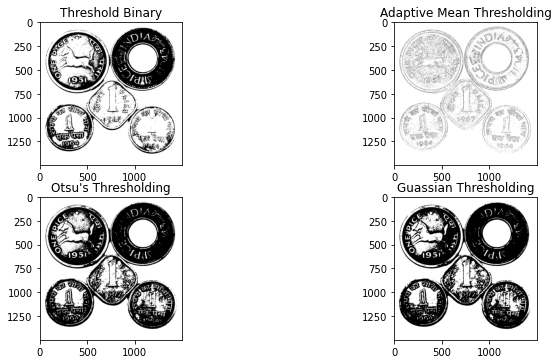

In [4]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
axs[0][0].imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Threshold Binary')
cv2.imwrite('species_thresh1_binary.png', thresh1)

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)
# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
axs[0][1].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Adaptive Mean Thresholding')
cv2.imwrite('species_thresh2_adaptive.png', thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axs[1][0].imshow(cv2.cvtColor(th2, cv2.COLOR_BGR2RGB))
axs[1][0].set_title("Otsu's Thresholding")
cv2.imwrite('species_thresh3_otsu.png', th2)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axs[1][1].imshow(cv2.cvtColor(th3, cv2.COLOR_BGR2RGB))
axs[1][1].set_title("Guassian Thresholding")
cv2.imwrite('species_thresh4_gaussian.png', th3)

plt.show()
